# Combining Sampling Methods with Attractor Dynamics in Spiking Models of Head-Direction Systems
## by Vojko Pjanovic, Jacob Zavatone-Veth, Paul Masset, Sander Keemink & Michele Nardin. 

Code written by Vojko Pjanovic and Michele Nardin.

This notebook includes the code for Fig. 1 panels B and C.

## Panel B: 
#### For increasing noise levels on the encoding of the angular velocity, the posterior distribution 𝑃 (𝜔𝑡 |𝝈𝑡 ) will show more and more uncertainty. 
 
The posterior over Poisson spikes is a Gumbel distribution: 
$P(\omega_t | \sigma_t) \propto e^{-e^{\beta \omega_t}}e^{\beta \omega_t \sigma_t}$

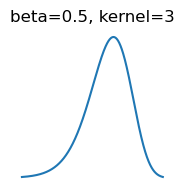

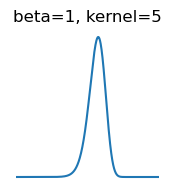

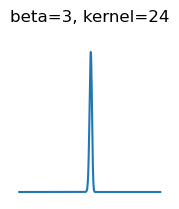

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# plot pdf of gumbel distribution
omega = 1
np.random.seed(0)
for beta in [0.5, 1, 3]:
    kernel = np.random.poisson(np.exp(beta*omega))
    x = np.linspace(-3,5,1000)
    plt.figure(figsize=(2,2))
    y = np.exp(beta*kernel*x - np.exp(beta*x))
    plt.plot(x,y)
    plt.axis('off')
    plt.title(f'beta={beta}, kernel={kernel}')
    plt.show()

 
 ## Panel C: 
 #### Estimating true density and statistics through sampling (colorful arrows: samples, grey line: samples histogram, blue line: true distribution).

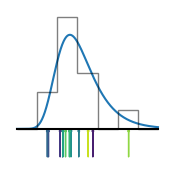

In [40]:
# sample 20 samples from gumbel distribution with beta = 1
# then plot these samples as small arrows, each of different color, on the x axis
np.random.seed(13)
samples = np.random.gumbel(0,1,12)
plt.figure(figsize=(2,2))

# plot pdf first
x = np.linspace(-3,5,1000)
y = np.exp(-x - np.exp(-x))
plt.plot(x,y,label='true density')

plt.plot(np.linspace(-3,5,1000),np.zeros(1000),'k')
for i,sample in enumerate(samples):
    plt.arrow(sample,-0.11,0,0.1,color=plt.cm.viridis(i/len(samples)),head_width=0.1,head_length=0.01,label='sample '+str(i))
plt.axis('off')

# plot the hist
plt.hist(samples,bins=np.linspace(-3,5,8),density=True,color='k',histtype='step',label='samples hist.',alpha=0.5)
plt.show()